# Digging into the dissappearance of nature's land-dwelling vertebrates

<img src="Result-percentage-breakdown-plot.png" style="width: 500px;"/>

------------------

During one of my many re-reads of the *amazing* (seriously, I cannot recommend it enough!) essay, ["What can a technologist do about climate change"](http://worrydream.com/ClimateChange/), by Brett Victor, I came across [this](http://worrydream.com/ClimateChange/#coda-other) incredible, provacative, and upsetting graphic:
<img src="WorryDreamVertebratesScreenShot.png" style="width: 500px;"/>

This graph shows another example of how over the last 150 years or so, humans have come to dominate the earth. Like many other hockey stick graphs we've seen, the exponential growth of our impact is hard to wrap your head around.


But this graph also raises so many more questions. *How did this happen?* That is, what was the biggest cause of this change? Can it be explained by the massive human population growth alone; or is it more about the radical death of wild land vertebrates; or more to do with an explosion in the numbers of our livestock from an increasingly meat-eating population?

And finally, and perhaps most importantly, what can be done about it? How much would we have to change in order to get back closer to a natural world?

In this post, I dig into the source of the data for the above graph, and find out the answers to those questions!

-----------
Brett Victor lists the source for the above plot as [this 1998 TED talk from Paul MacCready](https://www.ted.com/talks/paul_maccready_on_nature_vs_humans?language=en). The graph in MacCready's talk is the same as the plot from the WorryDream essay, but unfortunately doesn't provide any more detail. Here's a screenshot:

![Paul_MacCready_TED1998_screenshot.png](Paul_MacCready_TED1998_screenshot.png)

Fortunately, through some internet searching, I was able to find a more detailed version of this plot in a 2004 chapter MacCready wrote for "The Hydrogen Energy Transition", titled "The Case for Battery Electric Vehicles" ([Google Books link to page 230](https://books.google.com/books?id=EOasCtXvbOEC&lpg=PA227&ots=JQu1V86pig&dq=MacCready%2C%20Paul%2C%202004%2C%20%22The%20Case%20for%20Battery%20Electric%20Vehicles.%22&lr&pg=PA230#v=onepage&q&f=false)). This one breaks down the changes into their component parts, "Humans + Livetock + Pets", "Humans Only", "Wildlife Only".

Here is the graph cropped out of that page:
<img src="humans_vs_wildlife_graph.png" alt="MacCready, Paul, 2004, 'The Case for Battery Electric Vehicles.' In Daniel Sperling and James Cannon, eds., The Hydrogen Energy Transition New York: Academic Press, pp. 227-33" style="width: 500px;"><div style="margin-left: 20%; margin-right: 20%;"><small>MacCready, Paul, 2004, 'The Case for Battery Electric Vehicles.' In Daniel Sperling and James Cannon, eds., The Hydrogen Energy Transition New York: Academic Press, pp. 227-33</small></div></img>

----------------------

Surprisingly, I think this is not quite the same data as was used for the 1998 presentation, as we will see below. It seems likely that since this data was newer (2004 vs 1998), that it was updated with newer information, and so I'm guessing it's probably more accurate. Either way, it's _similar_ to the original data, and it's got the kind of break-down I was looking for.

The rest of this post is a jupyter notebook, a way of combining code and results into a document, like a lab notebook. Feel free to skip any of the code sections and just read the text and graphics, but for the curious, all the analysis done is included right inline in this page.

In [1]:
# Setting up this notebook for plotting our data analysis in python.
from matplotlib import pyplot as plt
import numpy as np
%pylab inline
matplotlib.rcParams['axes.xmargin'], matplotlib.rcParams['axes.ymargin'] = [0,0]  # wrap the plots tightly without margins.

Populating the interactive namespace from numpy and matplotlib


So first, we need to collect the raw data. I eyeballed points off of the curves above to trace the plot from MacCready's book:

In [2]:
# Eyeballed datapoints collected from "The Case for Battery Electric Vehicles" p230
hu_only_data  = {1850:60, 1875:70, 1900:90, 1910:95, 1925:105, 1940:125, 1950:135, 1962:170, 1975:210, 2000:290, 2025:420, 2050:570}
hu_plus_data  = {1850:95, 1875:110, 1900:135, 1910:155, 1925:200, 1940:255, 1950:315, 1962:445, 1975:665, 2000:1200, 2025:1935, 2050:2700}
wildlife_data = {1850:205, 1875:190, 1900:175, 1910:165, 1925:140, 1940:130, 1950:115, 1962:90, 1975:75, 2000:30, 2025:20, 2050:10}

hu_only  = sorted(hu_only_data.items())    # Turn them into sorted lists of
hu_plus  = sorted(hu_plus_data.items())    #  pairs to make plotting easier.
wildlife = sorted(wildlife_data.items())
years = sorted(wildlife_data.keys())       # Just the years (the X-axis points).

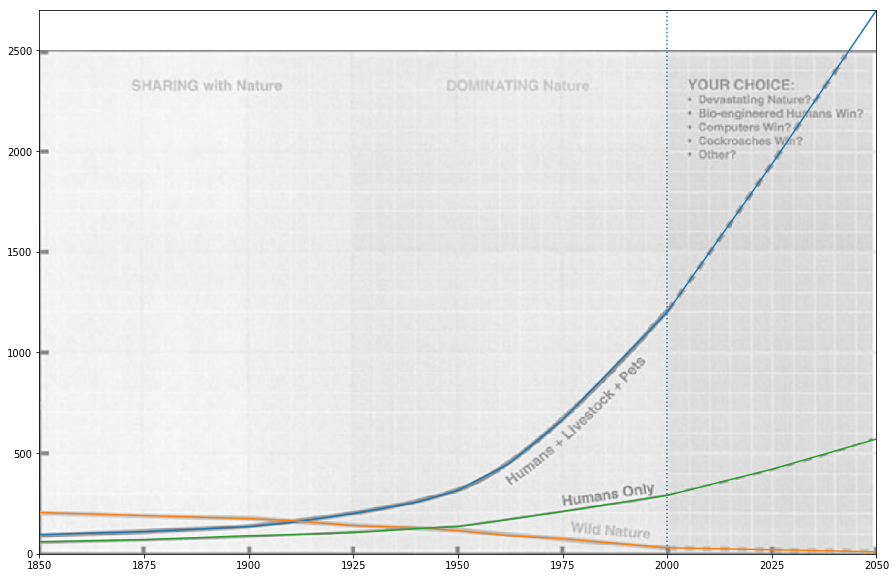

In [3]:
# Verify that the eyeballed datapoints are correct by plotting them overlaid on the original graphic.
fig, axes = plt.subplots(figsize=(15, 10))

im = plt.imread('humans_vs_wildlife_no_labels.png')
axes.imshow(im, aspect='auto', extent=(1850,2050,0,2500), alpha=0.5, zorder=-1,
                      origin='upper')

axes.plot(*zip(*hu_plus), alpha=1.0)
axes.plot(*zip(*wildlife), alpha=1.0)
axes.plot(*zip(*hu_only), alpha=1.0)
axes.axvline(2000, linestyle='dotted')

In [4]:
# We can calculate the values for only Livestock+Pets by subtracting humans out of Humans+Livestock+Pets
livestock_and_pets_data = {y : hu_plus_data[y]-hu_only_data[y] for y in years}
livestock_and_pets = sorted(livestock_and_pets_data.items())

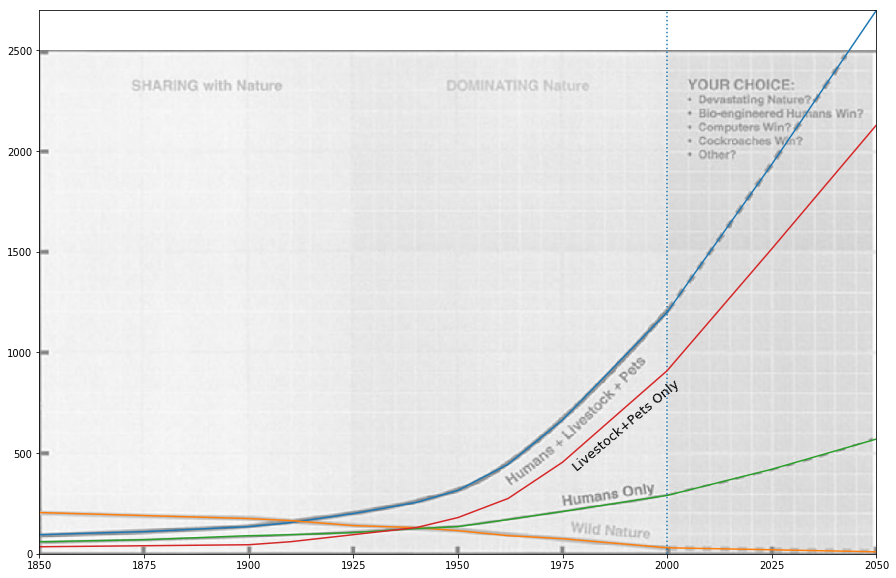

In [5]:
# Reuse axes from above to plot Livestock+Pets along with the other lines.
axes.plot(*zip(*livestock_and_pets), alpha=1.0)
axes.text(1977, 830, 'Livestock+Pets Only', size=13, rotation=40)
fig

It's interesting that the three lines cross around 1940. It's probably a coincedence, but it's interesting.

----------------
By plotting the data as a stackplot instead of as lines, we can see a bit more easily which changes had the greatest effect on this overall phenonemon.

In [6]:
from IPython.core.pylabtools import figsize
figsize(12, 6)  # Set the plot size for the rest of the notebook

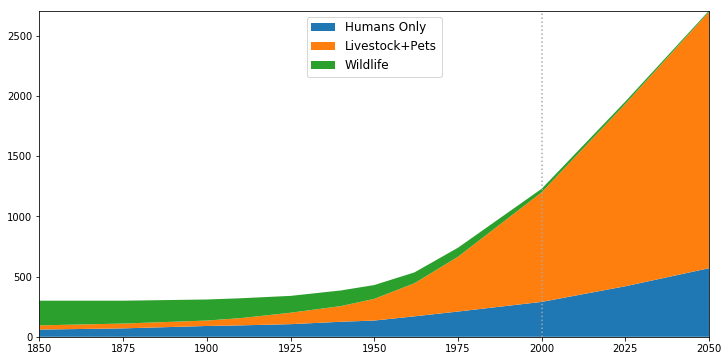

In [7]:
stacked_values = [[y for _,y in line] for line in [hu_only,livestock_and_pets,wildlife]]
plt.stackplot(years, stacked_values, baseline="zero", labels=['Humans Only', 'Livestock+Pets', 'Wildlife'])
plt.axvline(2000, linestyle='dotted',color='darkgray')
legend = plt.legend(loc='upper center', fontsize=12)
plt.show()

In [8]:
def find_change(datapoints, end_point):
    return (datapoints[end_point] / datapoints[1850])
print("Humans Only is now {0:0.0f}% of original value".format(find_change(hu_only_data, 2000)*100.0))
print("Livestock+Pets is now {0:0.0f}% of original value".format(find_change(livestock_and_pets_data, 2000)*100.0))
print("Wildlife is now {0:0.0f}% of original value".format(find_change(wildlife_data, 2000)*100.0))

Humans Only is now 483% of original value
Livestock+Pets is now 2600% of original value
Wildlife is now 15% of original value


## So we have our answers. 

It seems that the largest change has happened in our livestock, which has exploded. It's grown by ~25 times!
The next biggest change is the loss of wildlife, which has shrunk by ~6 times.
Finally, humans have grown by ~5 times, which is still an incredibly large change.

------------

Those changes are even more exagurated if you follow MacCready's predictions out to 2050:

In [9]:
print("Humans Only becomes {0:0.0f}% of original value".format(find_change(hu_only_data, 2050)*100.0))
print("Livestock+Pets becomes {0:0.0f}% of original value".format(find_change(livestock_and_pets_data, 2050)*100.0))
print("Wildlife becomes now {0:0.0f}% of original value".format(find_change(wildlife_data, 2050)*100.0))

Humans Only becomes 950% of original value
Livestock+Pets becomes 6086% of original value
Wildlife becomes now 5% of original value


### As percentages
Finally, we can reproduce the original graphic as seen on worrydream using this data. The graph is slightly less of a hockey-stick than the plot from MacCready's 1998 talk, but it's still pretty flooring.

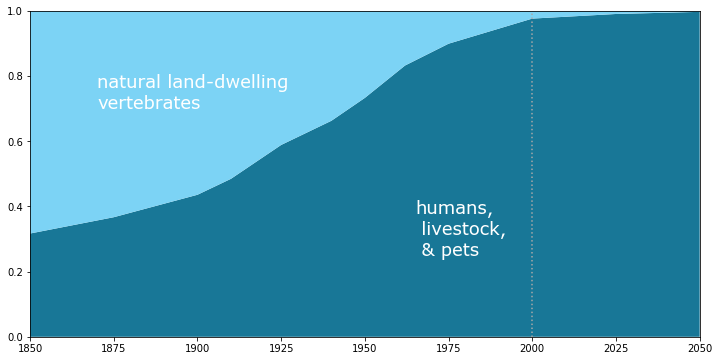

In [10]:
total_mass_by_year = [hu_plus[i][1] + wildlife[i][1] for i in range(0,len(wildlife))]
hu_plus_percent_graph = [hu_plus[i][1] / total_mass_by_year[i] for i in range(0,len(wildlife))]
wildlife_percent_graph = [wildlife[i][1] / total_mass_by_year[i] for i in range(0,len(wildlife))]
plt.stackplot(years, *[hu_plus_percent_graph, wildlife_percent_graph], colors=['#187797', '#7cd3f5'])
plt.axvline(2000, linestyle='dotted',color='darkgray')
plt.text(1870, 0.7, 'natural land-dwelling\nvertebrates', color='white', family='Verdana', fontsize=18)
plt.text(1965, 0.25, 'humans,\n livestock,\n & pets', color='white', family='Verdana', fontsize=18)
plt.show()

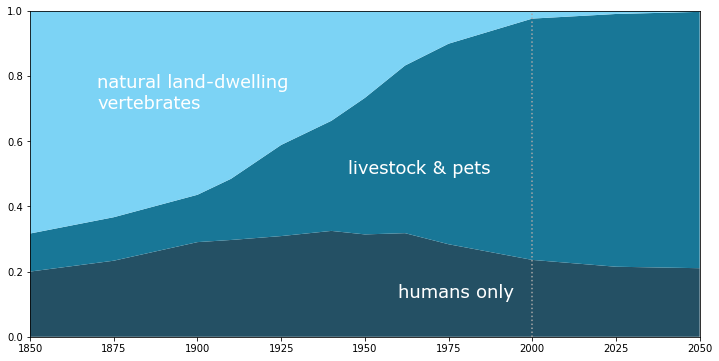

In [11]:
hu_only_percent_graph = [hu_only[i][1] / total_mass_by_year[i] for i in range(0,len(wildlife))]
livestock_percent_graph = [livestock_and_pets[i][1] / total_mass_by_year[i] for i in range(0,len(wildlife))]
plt.stackplot(years, *[hu_only_percent_graph, livestock_percent_graph, wildlife_percent_graph], colors=['#245064', '#187797', '#7cd3f5'])
plt.axvline(2000, linestyle='dotted',color='darkgray')
plt.text(1870, 0.7, 'natural land-dwelling\nvertebrates', color='white', family='Verdana', fontsize=18)
plt.text(1945, 0.5, 'livestock & pets', color='white', family='Verdana', fontsize=18)
plt.text(1960, 0.12, 'humans only', color='white', family='Verdana', fontsize=18)
plt.show()

As MacCready puts it, we've "won", and so we humans must now "make rational decisions now based on our 'ownership' of the whole planet."

The devestation of wildlife has been enormous, and this is just looking at *mass*, and completely leaves alone the losses to biodiversity.  But the rapid and extreme proliferation of livestock and pets is also enormous, and I think is much less common knowledge. If I had to guess, I'd say the majority of this explosion is from livestock. Pets probably account for less total mass than humans (since there are probably fewer of them in number and they are smaller).

**We eat a lot of meat, milk and eggs, friends.** (And wear a lot of wool?)

-----------------------

## So what to do about it? Imagining a nicer future.

Let's imagine we make a goal to try and make that bleak initial graphic look better in the coming years. Let's say our goal is to "restore the balance of between humans and wildlife", whatever that looks like.

Let's also bake in the assumption that we want to do this in the way that will be _best for humans_ in the long run, to eliminate any more insidious solutions.


-------

Below, I imagine a hypothetical dream future, but it does feel within our reach.<br><br>

First, let's start with the good news: modern estimates of population growth have the human population growth slowing down over the next 50 years, rather than accelerating as in MacCready's projections, above. The lowest-growth projection from [Wikipedia's Projections of population growth page](https://en.wikipedia.org/wiki/Projections_of_population_growth) puts us leveling out by 2050 at ~9 billion people, and medium-growth projections have us level out around ~11bn in 2100. The [UN says ~11bn is pretty likely](http://www.un.org/en/development/desa/news/population/2015-report.html). Since we're being hypothetical, let's put it at a nice round 10 billion.

Next, it seems like a great dream goal would be to restore the mass of land wildlife back to their 1850 levels -- i.e. bring the mass of "natural" land-dwelling vertebrates back to 205m tons.

Finally, perhaps most important, we'd need to drastically reduce the livestock and pets population. It seems like a reasonable goal would be to return to the same _ratio_ of livestock+pets to humans as we had in 1850. If humans were surviving, thriving and expanding with that level of livestock per person, it seems like we could do so again. This might mean eating less meat, being less wasteful with our meat, eating more lab-produced meat, eating more bugs, or something else entirely, but it seems very within our reach.

In [12]:
# Calulate the original ratio of Humans to Humans+Livestock+Pets
initial_humans_to_hu_plus_ratio = hu_only[0][1] / hu_plus[0][1]
print("In 1850, livestock+pets were {0:0.0f}% of humanity's mass footprint.".format(100*(1-initial_humans_to_hu_plus_ratio)))

In 1850, livestock+pets were 37% of humanity's mass footprint.


Now we can estimate humanity's 2100 mass using our 10 billion people plateau scenario, along with our imagined goal masses for livestock+pets, and wildlife.

In [13]:
mass_in_2000 = hu_only_data[2000]
world_pop_2000 = 6  # 6bn [source: UN](http://www.un.org/esa/population/publications/sixbillion/sixbillion.htm)
world_pop_2100_est = 10  # ~11bn [source: UN](http://www.un.org/en/development/desa/news/population/2015-report.html)
# NOTE: this assumes that per-person mass remains constant from 2000 to 2100.
imagined_final_hu_only_mass = (world_pop_2100_est / world_pop_2000) * mass_in_2000
print("Estimated human mass in 2100: {0:0.0f}m tons".format(imagined_final_hu_only_mass))
imagined_final_hu_plus = imagined_final_hu_only_mass / initial_humans_to_hu_plus_ratio
print("Imagined humans+livestock+pets mass in 2100: {0:0.0f}m tons".format(imagined_final_hu_plus))
initial_wildlife_mass = wildlife[0][1]
print("Imagined wildlife mass in 2100: {0:0.0f}m tons -- the same as it was in {1:d}".format(initial_wildlife_mass, wildlife[0][0]))

Estimated human mass in 2100: 483m tons
Imagined humans+livestock+pets mass in 2100: 765m tons
Imagined wildlife mass in 2100: 205m tons -- the same as it was in 1850


In [14]:
# Let's imagine some reasonable looking curves that could get us there.
imagined_hu_only_data  = {**hu_only_data, 2025:360, 2050:420, 2075:450, 2100:imagined_final_hu_only_mass}
imagined_hu_plus_data  = {**hu_plus_data, 2025:1200, 2050:960, 2075:820,  2100:imagined_final_hu_plus}
imagined_wildlife_data = {**wildlife_data, 2025:35, 2050:60, 2075:110, 2100:initial_wildlife_mass}
imagined_hu_plus  = sorted(imagined_hu_plus_data.items())
imagined_hu_only  = sorted(imagined_hu_only_data.items())
imagined_wildlife = sorted(imagined_wildlife_data.items())

imagined_years = sorted(imagined_wildlife_data.keys())

In [15]:
imagined_livestock_and_pets = [(imagined_years[i], imagined_hu_plus[i][1]-imagined_hu_only[i][1]) for i in range(0,len(imagined_hu_only))]

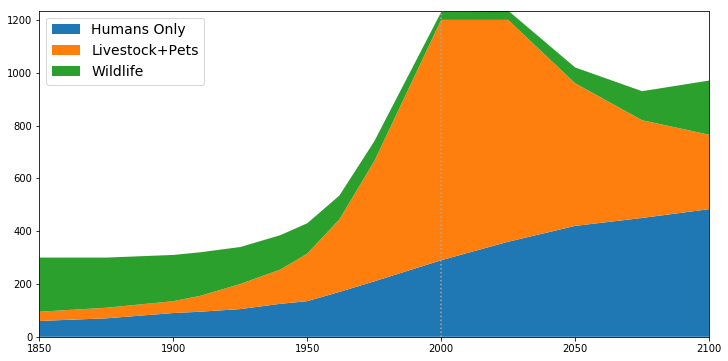

In [16]:
fig, ax= plt.subplots()
stacked_values = [[y for _,y in line] for line in [imagined_hu_only,imagined_livestock_and_pets,imagined_wildlife]]
plt.stackplot(imagined_years, stacked_values, baseline="zero", labels=['Humans Only', 'Livestock+Pets', 'Wildlife'])
plt.axvline(2000, linestyle='dotted',color='darkgray')
legend = plt.legend(loc='upper left', fontsize=14)
plt.show()

Now, of course, this is just my imagination -- and it's based on nothing, but it doesn't seem impossible.

I figured the best we can hope for by 2025 regarding livestock & pets is leveling off, or a little growth. Then maybe we could start reducing that number slowly. This would likely mean the most technologically developed nations reducing their livestock numbers significantly, as developing nations slow and then eventually reverse their livestock growth. I put the wildlife numbers increasing smoothly, every year towards 2100.

This imagined world ends up just about 2 parts humans, 1 part livestock&pets, and 1 part wildlife, by mass. That seems a lot better than the world we have now, and it seems fairly doable. For one thing, it's only a 50% reduction in the mass of livestock and pets. That doesn't seem too hard. Interestingly, the total mass will be almost three times as large as 1850, but in 2000 it was already four times as large!

-----

And best of all, these changes would make a pretty big dent in our original percentage-based graphic:

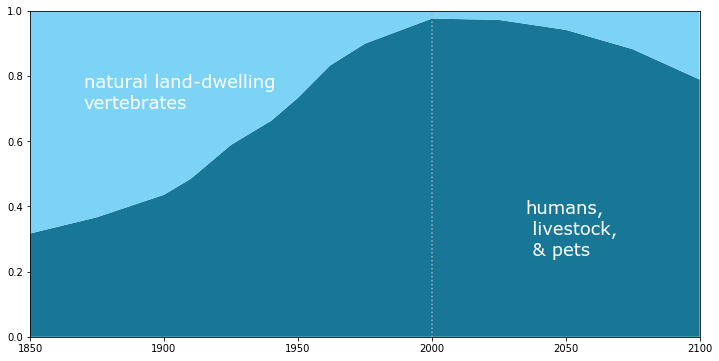

In [17]:
imagined_totals = [imagined_hu_plus[i][1] + imagined_wildlife[i][1] for i in range(0,len(imagined_wildlife))]
imagined_percent_graph = [imagined_hu_plus[i][1] / imagined_totals[i] for i in range(0,len(imagined_wildlife))]
plt.stackplot(imagined_years, *[imagined_percent_graph, [1-x for x in imagined_percent_graph]], colors=['#187797', '#7cd3f5'])
plt.axvline(2000, linestyle='dotted',color='darkgray')
plt.text(1870, 0.7, 'natural land-dwelling\nvertebrates', color='white', family='Verdana', fontsize=18)
plt.text(2035, 0.25, 'humans,\n livestock,\n & pets', color='white', family='Verdana', fontsize=18)
plt.show()

20% wildlife is a lot better than 5%. Let's get started!